Epoch [1/100] | Train Acc: 40.24% | Test Acc: 50.00% | Loss: 2.3183
Epoch [2/100] | Train Acc: 48.78% | Test Acc: 50.00% | Loss: 2.2627
Epoch [3/100] | Train Acc: 50.00% | Test Acc: 50.00% | Loss: 2.2065
Epoch [4/100] | Train Acc: 36.59% | Test Acc: 48.78% | Loss: 2.2861
Epoch [5/100] | Train Acc: 47.56% | Test Acc: 45.12% | Loss: 2.2303
Epoch [6/100] | Train Acc: 57.32% | Test Acc: 37.80% | Loss: 2.0288
Epoch [7/100] | Train Acc: 51.22% | Test Acc: 40.24% | Loss: 2.1910
Epoch [8/100] | Train Acc: 53.66% | Test Acc: 41.46% | Loss: 2.0245
Epoch [9/100] | Train Acc: 48.78% | Test Acc: 41.46% | Loss: 2.1562
Epoch [10/100] | Train Acc: 46.34% | Test Acc: 45.12% | Loss: 2.1761
Epoch [11/100] | Train Acc: 50.00% | Test Acc: 46.34% | Loss: 2.2159
Epoch [12/100] | Train Acc: 53.66% | Test Acc: 46.34% | Loss: 2.0638
Epoch [13/100] | Train Acc: 54.88% | Test Acc: 48.78% | Loss: 2.0408
Epoch [14/100] | Train Acc: 53.66% | Test Acc: 48.78% | Loss: 2.0659
Epoch [15/100] | Train Acc: 56.10% | Test A

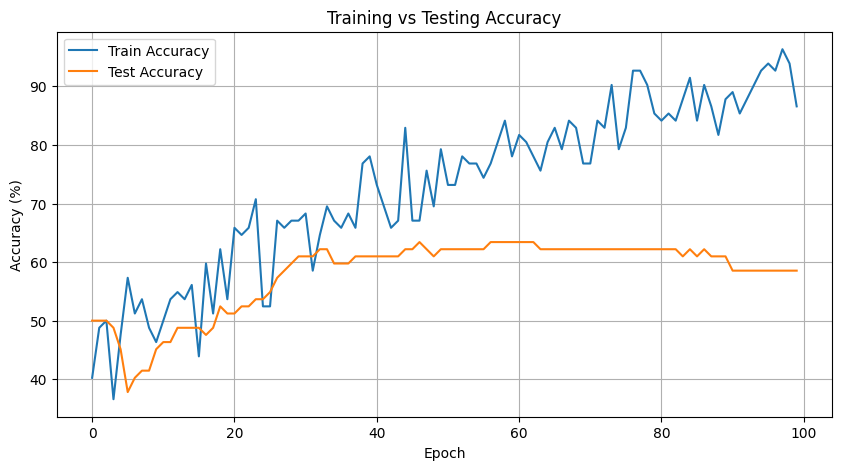

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Data Preparation (with augmentation)
# ----------------------------
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)
test_dataset = datasets.ImageFolder(root='dataset/Test', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset.classes)

# ----------------------------
# Simpler CNN Classifier
# ----------------------------
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Dropout(0.25)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 32 * 32, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# ----------------------------
# Training Setup
# ----------------------------
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Evaluation on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_acc = 100. * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss:.4f}")

# ----------------------------
# Plot Accuracy and Loss
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Epoch [1/100] | Train Acc: 63.19% | Test Acc: 51.22% | Loss: 4.0327
Epoch [2/100] | Train Acc: 55.49% | Test Acc: 54.88% | Loss: 4.0847
Epoch [3/100] | Train Acc: 51.65% | Test Acc: 50.00% | Loss: 4.0519
Epoch [4/100] | Train Acc: 64.29% | Test Acc: 48.78% | Loss: 3.9565
Epoch [5/100] | Train Acc: 60.99% | Test Acc: 50.00% | Loss: 3.8490
Epoch [6/100] | Train Acc: 61.54% | Test Acc: 50.00% | Loss: 3.9237
Epoch [7/100] | Train Acc: 63.19% | Test Acc: 50.00% | Loss: 3.8319
Epoch [8/100] | Train Acc: 65.38% | Test Acc: 50.00% | Loss: 3.7729
Epoch [9/100] | Train Acc: 69.23% | Test Acc: 50.00% | Loss: 3.6784
Epoch [10/100] | Train Acc: 70.88% | Test Acc: 52.44% | Loss: 3.6780
Epoch [11/100] | Train Acc: 71.98% | Test Acc: 51.22% | Loss: 3.5609
Epoch [12/100] | Train Acc: 70.33% | Test Acc: 53.66% | Loss: 3.6619
Epoch [13/100] | Train Acc: 77.47% | Test Acc: 53.66% | Loss: 3.3689
Epoch [14/100] | Train Acc: 78.57% | Test Acc: 54.88% | Loss: 3.4254
Epoch [15/100] | Train Acc: 78.02% | Test A

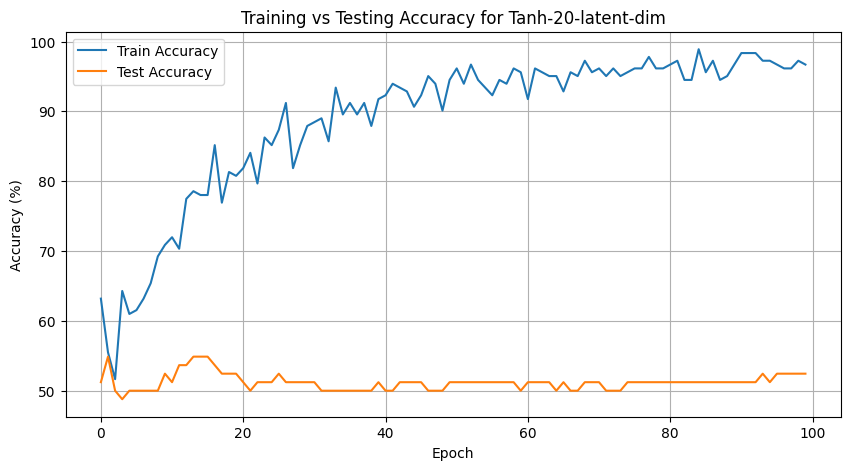

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Data Preparation (with augmentation)
# ----------------------------
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

visualize_paramters="Tanh-20-latent-dim"
train_dataset_1 = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)

# Load the second dataset (fake_Data.train)
train_dataset_2 = datasets.ImageFolder(root=f'generated_images/{visualize_paramters}', transform=data_transforms)

# Combine the two datasets
train_dataset = torch.utils.data.ConcatDataset([train_dataset_1, train_dataset_2])

test_dataset = datasets.ImageFolder(root='dataset/Test', transform=transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
]))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset_1.classes)

# ----------------------------
# Simpler CNN Classifier
# ----------------------------
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Dropout(0.25)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 32 * 32, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# ----------------------------
# Training Setup
# ----------------------------
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Evaluation on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_acc = 100. * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss:.4f}")

# ----------------------------
# Plot Accuracy and Loss
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title(f'Training vs Testing Accuracy for {visualize_paramters}')
plt.legend()
plt.grid(True)
plt.show()



Epoch [1/100] | Train Acc: 42.31% | Test Acc: 50.00% | Loss: 4.5021
Epoch [2/100] | Train Acc: 43.41% | Test Acc: 50.00% | Loss: 4.4141
Epoch [3/100] | Train Acc: 52.20% | Test Acc: 50.00% | Loss: 4.2580
Epoch [4/100] | Train Acc: 46.70% | Test Acc: 50.00% | Loss: 4.2909
Epoch [5/100] | Train Acc: 49.45% | Test Acc: 52.44% | Loss: 4.2355
Epoch [6/100] | Train Acc: 51.65% | Test Acc: 58.54% | Loss: 4.2394
Epoch [7/100] | Train Acc: 53.30% | Test Acc: 64.63% | Loss: 4.1370
Epoch [8/100] | Train Acc: 63.19% | Test Acc: 58.54% | Loss: 4.1046
Epoch [9/100] | Train Acc: 54.95% | Test Acc: 52.44% | Loss: 4.0340
Epoch [10/100] | Train Acc: 59.34% | Test Acc: 51.22% | Loss: 4.0394
Epoch [11/100] | Train Acc: 56.59% | Test Acc: 51.22% | Loss: 3.9846
Epoch [12/100] | Train Acc: 66.48% | Test Acc: 52.44% | Loss: 3.9347
Epoch [13/100] | Train Acc: 59.34% | Test Acc: 52.44% | Loss: 4.0497
Epoch [14/100] | Train Acc: 68.68% | Test Acc: 52.44% | Loss: 3.7715
Epoch [15/100] | Train Acc: 65.93% | Test A

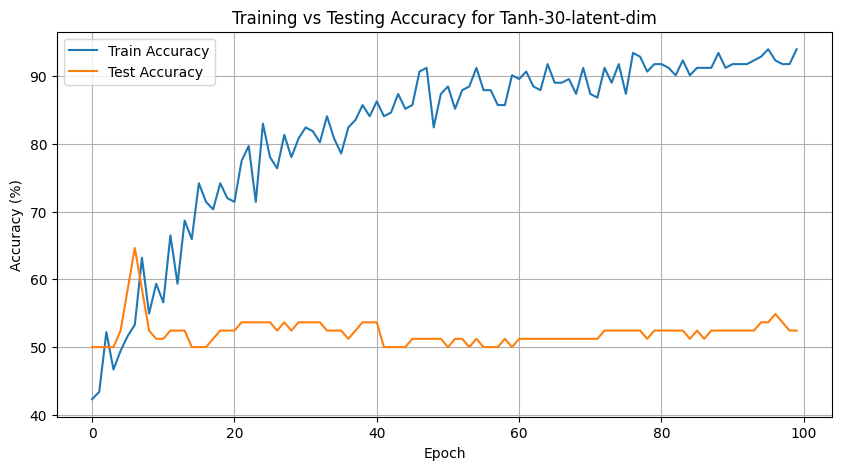

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Data Preparation (with augmentation)
# ----------------------------
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

visualize_paramters="Tanh-30-latent-dim"
train_dataset_1 = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)

# Load the second dataset (fake_Data.train)
train_dataset_2 = datasets.ImageFolder(root=f'generated_images/{visualize_paramters}', transform=data_transforms)

# Combine the two datasets
train_dataset = torch.utils.data.ConcatDataset([train_dataset_1, train_dataset_2])

test_dataset = datasets.ImageFolder(root='dataset/Test', transform=transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
]))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset_1.classes)

# ----------------------------
# Simpler CNN Classifier
# ----------------------------
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Dropout(0.25)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 32 * 32, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# ----------------------------
# Training Setup
# ----------------------------
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Evaluation on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_acc = 100. * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss:.4f}")

# ----------------------------
# Plot Accuracy and Loss
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title(f'Training vs Testing Accuracy for {visualize_paramters}')
plt.legend()
plt.grid(True)
plt.show()



Epoch [1/100] | Train Acc: 40.24% | Test Acc: 47.56% | Loss: 2.3055
Epoch [2/100] | Train Acc: 48.78% | Test Acc: 54.88% | Loss: 2.2695
Epoch [3/100] | Train Acc: 56.10% | Test Acc: 50.00% | Loss: 2.1940
Epoch [4/100] | Train Acc: 54.88% | Test Acc: 46.34% | Loss: 2.1506
Epoch [5/100] | Train Acc: 50.00% | Test Acc: 45.12% | Loss: 2.1830
Epoch [6/100] | Train Acc: 48.78% | Test Acc: 48.78% | Loss: 2.3101
Epoch [7/100] | Train Acc: 51.22% | Test Acc: 50.00% | Loss: 2.2669
Epoch [8/100] | Train Acc: 45.12% | Test Acc: 54.88% | Loss: 2.2682
Epoch [9/100] | Train Acc: 53.66% | Test Acc: 58.54% | Loss: 2.0852
Epoch [10/100] | Train Acc: 41.46% | Test Acc: 56.10% | Loss: 2.4347
Epoch [11/100] | Train Acc: 58.54% | Test Acc: 53.66% | Loss: 2.0974
Epoch [12/100] | Train Acc: 51.22% | Test Acc: 53.66% | Loss: 2.2571
Epoch [13/100] | Train Acc: 42.68% | Test Acc: 52.44% | Loss: 2.2990
Epoch [14/100] | Train Acc: 48.78% | Test Acc: 48.78% | Loss: 2.3560
Epoch [15/100] | Train Acc: 46.34% | Test A

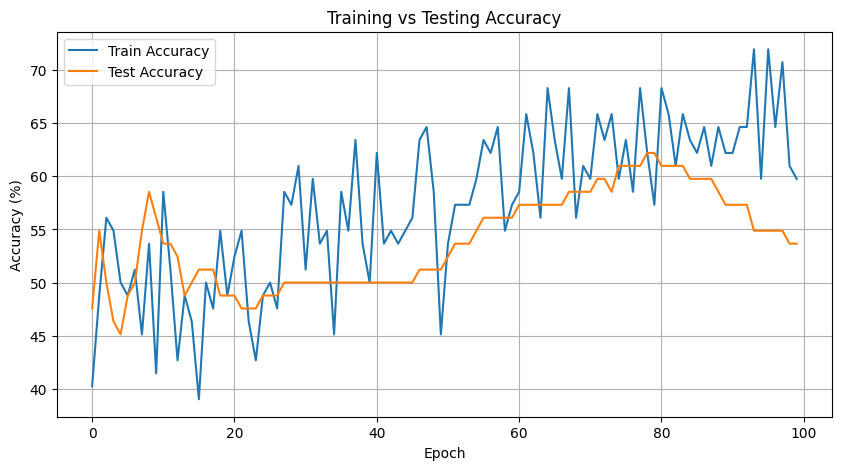

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Data Preparation (with augmentation)
# ----------------------------
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)
test_dataset = datasets.ImageFolder(root='dataset/Test', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset.classes)

# ----------------------------
# Simpler CNN Classifier
# ----------------------------
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Dropout(0.25)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 16 * 16, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# ----------------------------
# Training Setup
# ----------------------------
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Evaluation on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_acc = 100. * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss:.4f}")

# ----------------------------
# Plot Accuracy and Loss
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Epoch [1/100] | Train Acc: 45.60% | Test Acc: 50.00% | Loss: 4.3138
Epoch [2/100] | Train Acc: 40.66% | Test Acc: 50.00% | Loss: 4.4357
Epoch [3/100] | Train Acc: 47.25% | Test Acc: 50.00% | Loss: 4.3470
Epoch [4/100] | Train Acc: 46.15% | Test Acc: 50.00% | Loss: 4.3337
Epoch [5/100] | Train Acc: 45.05% | Test Acc: 50.00% | Loss: 4.3927
Epoch [6/100] | Train Acc: 51.10% | Test Acc: 50.00% | Loss: 4.2681
Epoch [7/100] | Train Acc: 48.35% | Test Acc: 48.78% | Loss: 4.2411
Epoch [8/100] | Train Acc: 47.80% | Test Acc: 48.78% | Loss: 4.2544
Epoch [9/100] | Train Acc: 46.15% | Test Acc: 48.78% | Loss: 4.3701
Epoch [10/100] | Train Acc: 49.45% | Test Acc: 42.68% | Loss: 4.2478
Epoch [11/100] | Train Acc: 47.80% | Test Acc: 42.68% | Loss: 4.2671
Epoch [12/100] | Train Acc: 55.49% | Test Acc: 41.46% | Loss: 4.1138
Epoch [13/100] | Train Acc: 53.85% | Test Acc: 41.46% | Loss: 4.1967
Epoch [14/100] | Train Acc: 47.80% | Test Acc: 42.68% | Loss: 4.3169
Epoch [15/100] | Train Acc: 44.51% | Test A

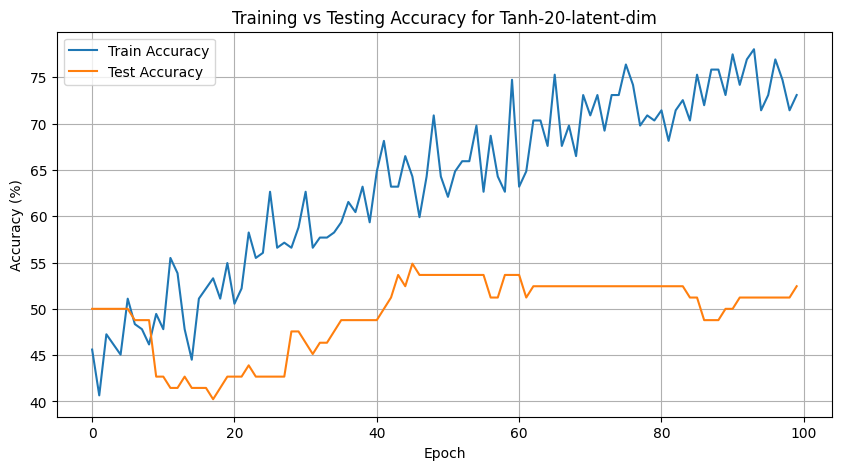

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Data Preparation (with augmentation)
# ----------------------------
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

visualize_paramters="Tanh-20-latent-dim"
train_dataset_1 = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)

# Load the second dataset (fake_Data.train)
train_dataset_2 = datasets.ImageFolder(root=f'generated_images/{visualize_paramters}', transform=data_transforms)

# Combine the two datasets
train_dataset = torch.utils.data.ConcatDataset([train_dataset_1, train_dataset_2])

test_dataset = datasets.ImageFolder(root='dataset/Test', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset_1.classes)

# ----------------------------
# Simpler CNN Classifier
# ----------------------------
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Dropout(0.25)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 16 * 16, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# ----------------------------
# Training Setup
# ----------------------------
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Evaluation on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_acc = 100. * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss:.4f}")

# ----------------------------
# Plot Accuracy and Loss
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title(f'Training vs Testing Accuracy for {visualize_paramters}')
plt.legend()
plt.grid(True)
plt.show()



Epoch [1/100] | Train Acc: 47.25% | Test Acc: 50.00% | Loss: 4.3819
Epoch [2/100] | Train Acc: 46.15% | Test Acc: 50.00% | Loss: 4.5166
Epoch [3/100] | Train Acc: 48.90% | Test Acc: 50.00% | Loss: 4.4612
Epoch [4/100] | Train Acc: 47.80% | Test Acc: 50.00% | Loss: 4.4496
Epoch [5/100] | Train Acc: 49.45% | Test Acc: 50.00% | Loss: 4.2649
Epoch [6/100] | Train Acc: 51.10% | Test Acc: 50.00% | Loss: 4.2925
Epoch [7/100] | Train Acc: 49.45% | Test Acc: 50.00% | Loss: 4.3348
Epoch [8/100] | Train Acc: 56.04% | Test Acc: 50.00% | Loss: 4.1682
Epoch [9/100] | Train Acc: 51.10% | Test Acc: 50.00% | Loss: 4.1817
Epoch [10/100] | Train Acc: 54.95% | Test Acc: 48.78% | Loss: 4.1797
Epoch [11/100] | Train Acc: 50.55% | Test Acc: 47.56% | Loss: 4.2895
Epoch [12/100] | Train Acc: 52.75% | Test Acc: 46.34% | Loss: 4.1796
Epoch [13/100] | Train Acc: 57.69% | Test Acc: 46.34% | Loss: 4.1001
Epoch [14/100] | Train Acc: 54.95% | Test Acc: 46.34% | Loss: 4.2441
Epoch [15/100] | Train Acc: 56.04% | Test A

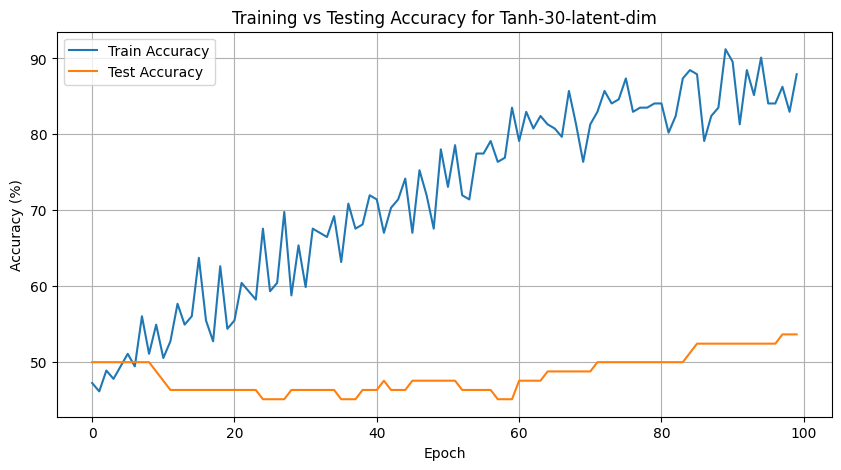

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Data Preparation (with augmentation)
# ----------------------------
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

visualize_paramters="Tanh-30-latent-dim"
train_dataset_1 = datasets.ImageFolder(root='dataset/Train', transform=data_transforms)

# Load the second dataset (fake_Data.train)
train_dataset_2 = datasets.ImageFolder(root=f'generated_images/{visualize_paramters}', transform=data_transforms)

# Combine the two datasets
train_dataset = torch.utils.data.ConcatDataset([train_dataset_1, train_dataset_2])

test_dataset = datasets.ImageFolder(root='dataset/Test', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset_1.classes)

# ----------------------------
# Simpler CNN Classifier
# ----------------------------
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        
            nn.Dropout(0.25)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 16 * 16, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

# ----------------------------
# Training Setup
# ----------------------------
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

num_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # Evaluation on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_acc = 100. * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Loss: {running_loss:.4f}")

# ----------------------------
# Plot Accuracy and Loss
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title(f'Training vs Testing Accuracy for {visualize_paramters}')
plt.legend()
plt.grid(True)
plt.show()

